# Development rig

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave,wave1
from waterwaves1.packing import unpack,unpack1
from waterwaves1.fourier import IEj

In [2]:
L_d=12
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,h,s=20,0.5,d*(1+0.0*Hmx_d)

In [3]:
sol=wave(N,h*Hmx_d*d,d=d,scaler=s)
sol1=wave1(N,h*Hmx_d*d,d=d,scaler=s)
sol.success,sol1.success

(True, True)

In [4]:
Ej,Bj,Ub,Q,R=unpack(sol.x)

Ej1,Q1,R1=unpack1(sol1.x)

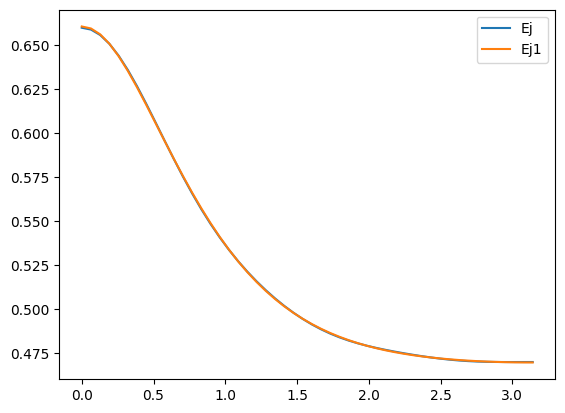

In [5]:
X=np.linspace(0,np.pi)
plt.plot(X,IEj([d,*Ej[:6]],X),label=f"Ej")
plt.plot(X,IEj([d,*Ej1],X),label=f"Ej1")
plt.legend()

In [6]:
d

0.5235987755982988

In [7]:
from waterwaves1.grids import grids

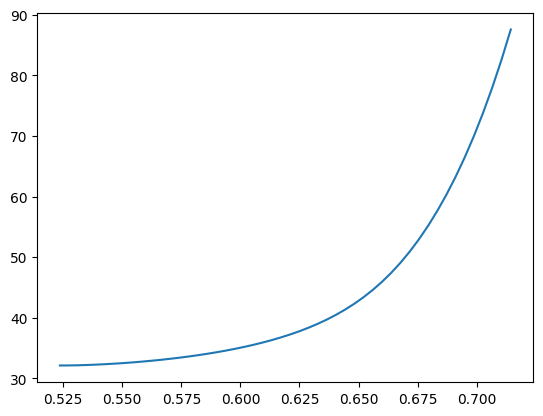

In [8]:
SS=d*(1+np.linspace(0,0.5)*Hmx_d)
Cnd=[]
for s in SS:
    g=grids(N,s)
    
    N=len(Ej)
    Etam=IEj([d,*Ej],g.Xm) # imposes depth constraint
    Etamj=Etam.reshape((N+1,1))@g.j.reshape((1,N))
    C,S=(np.exp,np.exp) if d==0 else (np.cosh,np.sinh) # hyperbolics for Y dependence, for deep water use exp
    CEmj,SEmj=C(Etamj)/g.scl,S(Etamj)/g.scl
    a=np.hstack([-Etam.reshape(N+1,1),(SEmj*g.CXmj)])
    UbBj=np.linalg.solve(a,-Q*np.ones(N+1)) # impose kinetic condition to derive Ub,Bj
    
    Cnd+=[np.linalg.cond(a)]

plt.plot(SS,Cnd)

In [9]:
d*(1+0.12*Hmx_d)

0.5694061538670794